In [4]:
import sqlite3

# Connect to (or create) the database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create the sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Sample data
sample_data = [
    ("Apples", 30, 1.2),
    ("Bananas", 50, 0.5),
    ("Oranges", 40, 0.8),
    ("Grapes", 20, 2.0),
    ("Mangoes", 25, 1.5),
    ("Bananas", 30, 0.5),
    ("Apples", 20, 1.2)
]

# Insert data into the table
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

# Commit and close
conn.commit()
conn.close()

print("✅ sales_data.db created with sample data.")


✅ sales_data.db created with sample data.


In [5]:
import sqlite3
conn = sqlite3.connect("sales_data.db")



In [8]:
import matplotlib.pyplot as plt

In [10]:
import pandas as pd


In [13]:
conn = sqlite3.connect("sales_data.db")  # Make sure the file is in the same folder


In [14]:
query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""


In [15]:
df = pd.read_sql_query(query, conn)


In [16]:
print(df)


   product  total_qty  revenue
0   Apples        100    120.0
1  Bananas        160     80.0
2   Grapes         40     80.0
3  Mangoes         50     75.0
4  Oranges         80     64.0


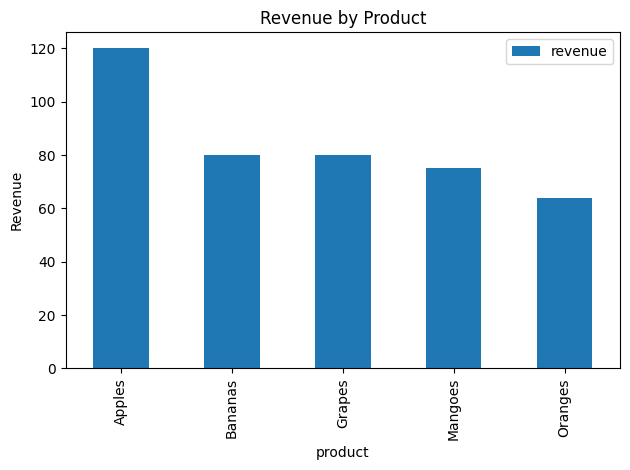

In [17]:
import matplotlib.pyplot as plt
df.plot(kind='bar', x='product', y='revenue')
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")  # optional
plt.show()
